In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
from numpy import random
from shapely.geometry import Point
%matplotlib inline
#Code based on example found on http://mattmurray.net/unlocking-the-power-of-geospatial-data-with-geopandas/

In [65]:
# to import the raw data into pandas
SFOEMS = pd.read_csv('SFO_EMS_FINAL_120619.csv', header=0)
SFOEMS.head()

,Address,IncidentDate,IncidentDay,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,ResponseTm,...,EMSPersonnel,OtherUnits,OtherPersonnel,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,Lat,Long
0,5th St/jessie Street,1/1/2016,Friday,1/1/2016,3:05:56 AM,1/1/2016,3:12:09 AM,1/1/2016,3:13:08,373,...,0,0,0,Good Intent,"good intent call, other",n none,6.0,South of Market,37.783292,-122.407189
1,Stockton St/sutter Street,1/1/2016,Friday,1/1/2016,8:20:46 AM,1/1/2016,8:24:57 AM,1/1/2016,8:25:17,251,...,0,0,0,False Alarm,"malicious, mischievous false call, other",n none,3.0,Financial District/South Beach,37.789435,-122.406959
2,277 Golden Gate Avenue,1/1/2016,Friday,1/1/2016,4:43:25 AM,1/1/2016,4:48:45 AM,1/1/2016,5:10:07,320,...,0,0,0,False Alarm,"smoke detector activation, no fire - unintenti...",n none,6.0,Tenderloin,37.781635,-122.415111
3,Minna St/4th Street,1/1/2016,Friday,1/1/2016,5:55:50 PM,1/1/2016,6:03:16 PM,1/1/2016,18:05:59,446,...,0,0,0,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,37.784043,-122.403715
4,Golden Gate Av/6th Street,1/1/2016,Friday,1/1/2016,5:35:47 AM,1/1/2016,5:41:10 AM,1/1/2016,5:42:21,323,...,0,0,0,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,37.782230,-122.410293


In [66]:
#To add row 'geometry' from 'Lat' and 'Long' for use in geopandas
SFOEMS['geometry'] = SFOEMS.apply(lambda row: Point(row['Long'], row['Lat']), axis=1)
SFOEMS.sample(5)

,Address,IncidentDate,IncidentDay,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,ResponseTm,...,OtherUnits,OtherPersonnel,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,Lat,Long,geometry
23658,74 6th Street,10/2/2016,Sunday,10/2/2016,8:09:26 PM,10/2/2016,8:12:16 PM,10/2/2016,21:24:46,170,...,0,0,Good Intent,"good intent call, other",n none,6.0,South of Market,37.781064,-122.409322,POINT (-122.409322 37.781064)
18502,"364 Avenue H, Ti",8/3/2016,Wednesday,8/3/2016,6:16:29 PM,8/3/2016,6:20:03 PM,8/3/2016,18:47:02,214,...,0,0,False Alarm,"false alarm or false call, other",n none,6.0,Treasure Island,37.822429,-122.367978,POINT (-122.367978 37.822429)
37746,139 6th Street,3/6/2017,Monday,3/6/2017,9:47:11 AM,3/6/2017,9:50:28 AM,3/6/2017,9:59:01,197,...,0,0,False Alarm,"municipal alarm system, malicious false alarm",n none,6.0,South of Market,37.780483,-122.407976,POINT (-122.407976 37.780483)
33717,2317 Jones Street,1/18/2017,Wednesday,1/18/2017,7:27:52 PM,1/18/2017,7:32:57 PM,1/18/2017,19:47:17,305,...,0,0,False Alarm,"false alarm or false call, other",n none,2.0,Russian Hill,37.802598,-122.416453,POINT (-122.416453 37.802598)
26403,2330 Po Street,11/2/2016,Wednesday,11/2/2016,4:34:51 PM,11/2/2016,4:43:37 PM,11/2/2016,16:49:34,526,...,0,0,EMS,"medical assist, assist ems crew",n none,5.0,Japantown,37.784316,-122.440252,POINT (-122.440252 37.784316)


In [67]:
#To create new dataframe to only include 'geometry' and select random sample of data from dataset as using all data points makes the map too difficult to read
SFOEMS_sample = SFOEMS[['geometry']]
SFOEMS_sample = SFOEMS_sample.sample(n=20000)
SFOEMS_sample.head()

,geometry
22909,POINT (-122.409017 37.799488)
6901,POINT (-122.420512 37.731595)
16742,POINT (-122.405223 37.788694)
54176,POINT (-122.459004 37.711387)
44296,POINT (-122.41297 37.78105)


In [68]:
#To create a GeoDataFrame from the data
geo_SFO_EMS = geopandas.GeoDataFrame(SFOEMS_sample, geometry='geometry')
geo_SFO_EMS.crs = {'init': 'epsg:4326'}
geo_SFO_EMS.head()

,geometry
22909,POINT (-122.40902 37.79949)
6901,POINT (-122.42051 37.73159)
16742,POINT (-122.40522 37.78869)
54176,POINT (-122.45900 37.71139)
44296,POINT (-122.41297 37.78105)


In [69]:
#To ensure type is GeoDataFrame
type(geo_SFO_EMS)

geopandas.geodataframe.GeoDataFrame

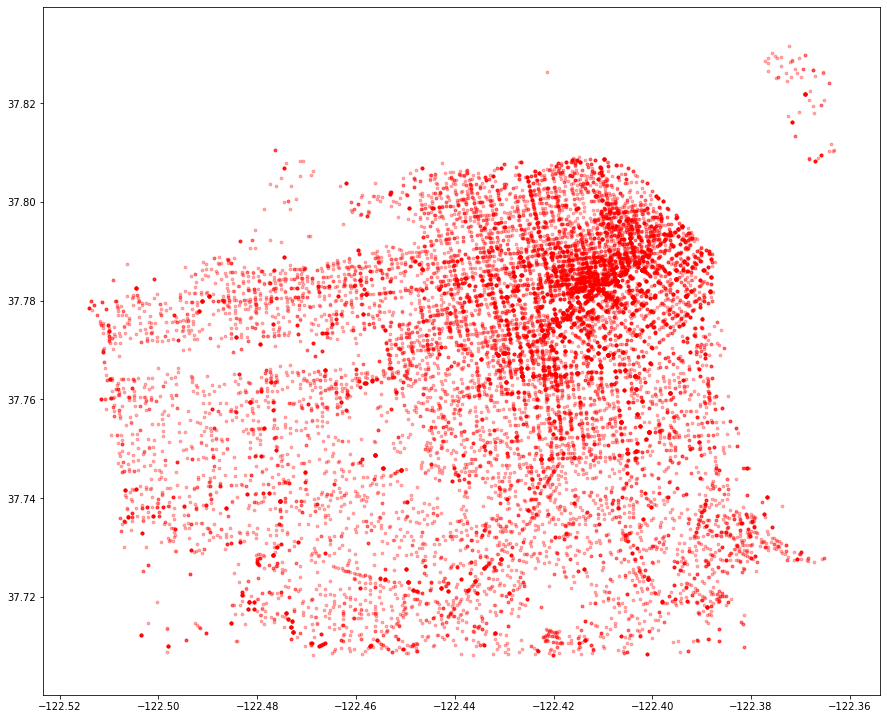

In [70]:
#To generate coordinate data from the GeoDataFrame on a lat/long map
geo_SFO_EMS.plot(figsize=(15,15), marker="o", color="red", markersize=8, alpha=0.3)
plt.show()

In [71]:
#Source: https://geodata.lib.berkeley.edu/catalog/ark28722-s7888q
#To generate the San Francisco map 
sf = geopandas.read_file('san-francisco.geojson')
sf.crs = {'init': 'epsg:4326'}
sf = sf.rename(columns={'geometry': 'geometry','nhood':'neighborhood_name'}).set_geometry('geometry')
sf.sample(5)

,OBJECTID,DISTRICT,COMPANY,geometry
8,9,NORTHERN,E,"POLYGON ((-122.44565 37.80537, -122.44399 37.8..."
9,10,TENDERLOIN,J,"POLYGON ((-122.41795 37.78602, -122.41654 37.7..."
0,1,CENTRAL,A,"POLYGON ((-122.40532 37.80687, -122.40440 37.8..."
6,7,INGLESIDE,H,"POLYGON ((-122.40830 37.70833, -122.41009 37.7..."
4,5,PARK,F,"POLYGON ((-122.44665 37.77588, -122.44683 37.7..."


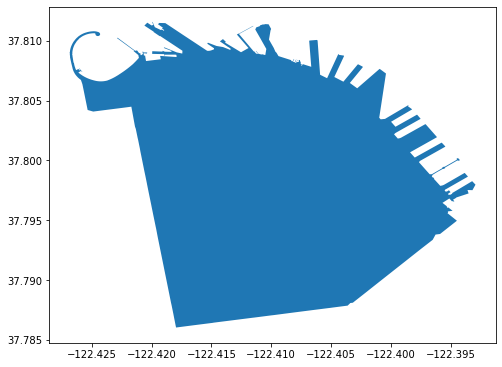

In [72]:
#To test that one neighborhood section of the map works
sf[0:1].plot(figsize=(8,8))
plt.show()

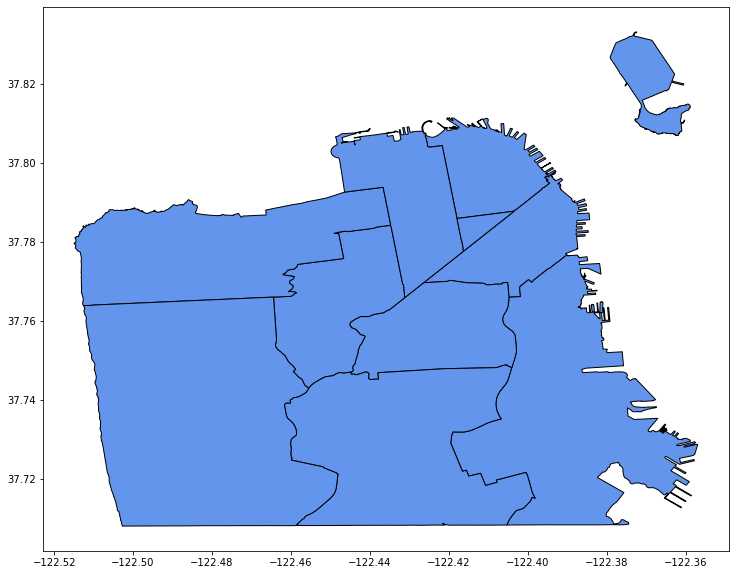

In [73]:
#To generate all neighborhoods of San Francisco and change the color
sf.plot(figsize=(13,10), color='cornflowerblue', edgecolor='black')
plt.show()

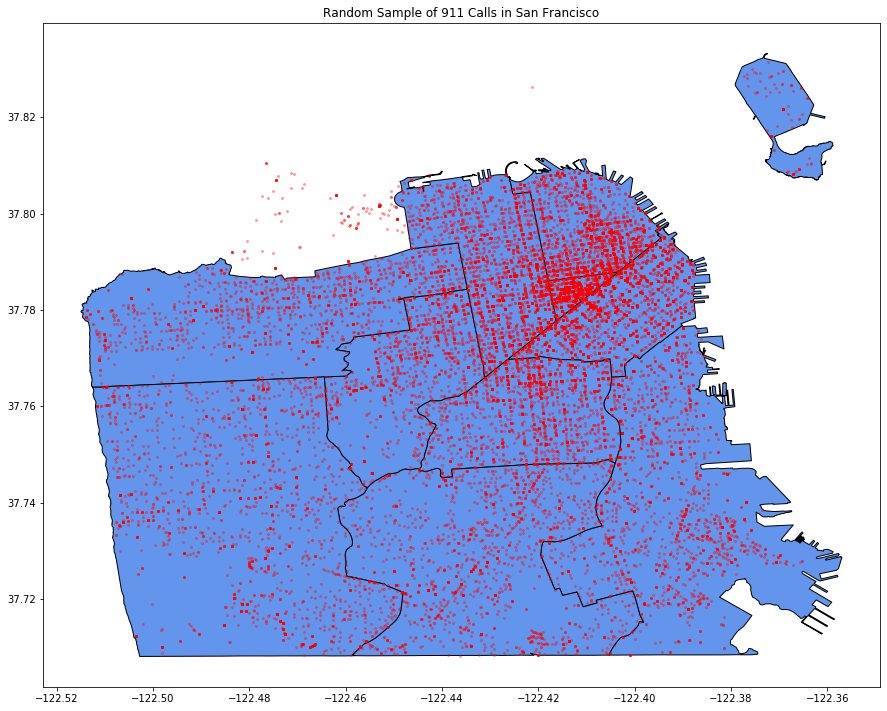

In [74]:
fig, ax = plt.subplots(1, figsize=(15,15))
sf_map = sf.plot(ax=ax, color='cornflowerblue', edgecolor='black')
geo_SFO_EMS.plot(ax=sf_map, marker="o", color='red', markersize=4, alpha=0.3)
#geo_SFO_EMS.plot(figsize=(13,10), marker="o", color="red", markersize=8, alpha=0.3)
#geo_SFO_EMS.plot(ax=sf_map, marker='o', color='red', markersize=8, alpha=0.3)
ax.set_title('Random Sample of 911 Calls in San Francisco')
plt.show()